#This ipython notebook just loads the spot pricing dataset

the spot pricing dataset is assumed to be in json in the data/ directory.  

##step 1... import all required libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
df = pd.read_json('../data/m1.xlarge.json')
df = df.set_index('Timestamp')
df[:5]


,AvailabilityZone,InstanceType,ProductDescription,SpotPrice
Timestamp,,,,
2015-06-02T10:40:18.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0334
2015-06-02T10:40:18.000Z,us-east-1b,m1.xlarge,Linux/UNIX (Amazon VPC),0.0372
2015-06-02T10:40:18.000Z,us-east-1a,m1.xlarge,Linux/UNIX (Amazon VPC),0.0394
2015-06-02T10:32:12.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0332
2015-06-02T10:32:12.000Z,us-east-1b,m1.xlarge,Linux/UNIX (Amazon VPC),0.0371


In [28]:
df.groupby('AvailabilityZone').var()

,SpotPrice
AvailabilityZone,
us-east-1a,0.000996
us-east-1b,0.000001
us-east-1c,0.000000
us-east-1d,0.000046
us-east-1e,0.000003


In [88]:
for key, grp in df.groupby(["AvailabilityZone"], as_index=False):
    x = grp
    
x[0:5]


,AvailabilityZone,InstanceType,ProductDescription,SpotPrice
Timestamp,,,,
2015-06-02T10:40:18.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0334
2015-06-02T10:32:12.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0332
2015-06-02T10:15:46.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0333
2015-06-02T10:07:14.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0332
2015-06-02T09:58:52.000Z,us-east-1e,m1.xlarge,Linux/UNIX (Amazon VPC),0.0330


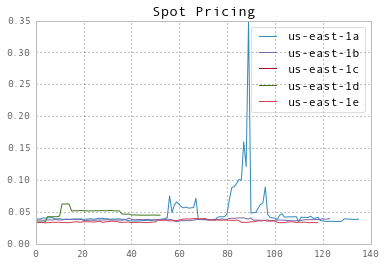

In [85]:
for key, grp in df.groupby(['AvailabilityZone'], as_index=False):
    plt.plot(grp['SpotPrice'], label=key)

plt.legend()
plt.title('Spot Pricing')
plt.show()


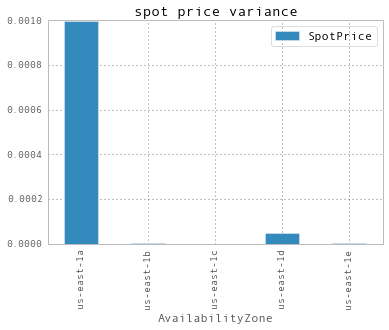

In [66]:
df.groupby(["AvailabilityZone"]).var().plot(kind='bar', title='spot price variance')
